# Optimal Thresholding Segmentation

<div style="font-family: Palatino Linotype;align-items:flex-start;float: left;">

#### Contributors:

| Name   |      IDs      |
|----------|:-------------:|
| George Magued |  37 - 0930 |
| Youssef Tarek Salah El Dine | 37-3865 |
</div>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as matimage
import imageio

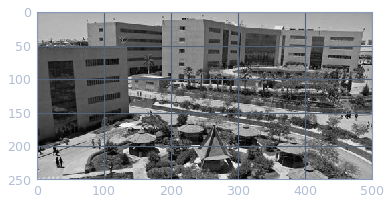

In [14]:
guc = plt.imread("images/guc.jpg")
plt.imshow(guc, cmap="gray")

In [190]:
def optimal_thresholding(image, n):
    min = image.min()
    max = image.max()
    
    thresholds = np.insert(np.linspace(min, max, n, endpoint=False).astype(int), n, max) 
    while(True):
        segment_means = np.empty(n)
        for i in range(n):
            segment_means[i] = image[(image >= thresholds[i]) & (image < thresholds[i + 1])].mean().astype(int)
        new_thresholds = np.empty(n - 1)
        for i in range(n - 1):
            new_thresholds[i] = (segment_means[i] + segment_means[i + 1]) // 2
        new_thresholds = np.insert(np.sort(new_thresholds), [0, n - 1], [min, max]).astype(int)
        if(np.array_equal(thresholds, new_thresholds)):
            break
        thresholds = new_thresholds.copy()
    x, y = image.shape
    segments = np.empty((n, x, y))
    for i in range(n):
        segments[i] = np.where(((image >= thresholds[i]) & (image < thresholds[i + 1])), 1, 0)
    return segments

In [194]:
def segment_image(image, n, name):
    thresholds = n + 1
    segments = optimal_thresholding(guc, thresholds)
    segmented_image = np.empty(image.shape)
    colors = np.linspace(0, 255, thresholds, endpoint=True)
    
    for i in range(thresholds):
        segment = segments[i]
        segmented_image = segmented_image + np.where(segment != 0, colors[i], 0)
        plt.imsave(f'output/optimal_thresholding/{name}_{n}_{i+1}.jpg', segments[i], cmap="gray")
    
    plot_segments(segments, segmented_image)
    plt.imsave(f'output/optimal_thresholding/{name}_{n}.jpg', segmented_image, cmap="gray")

In [201]:
def plot_segments(segments, segment_image):
    fig = plt.figure(figsize=(10, 5), constrained_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=segments.shape[0])

    for i in range(segments.shape[0]):
        ax = fig.add_subplot(gs[:-1, i])
        ax.axis("off")
        ax.imshow(segments[i], cmap='gray')

    ax = fig.add_subplot(gs[-1, :])
    ax.axis("off")
    ax.imshow(segment_image, cmap="gray")

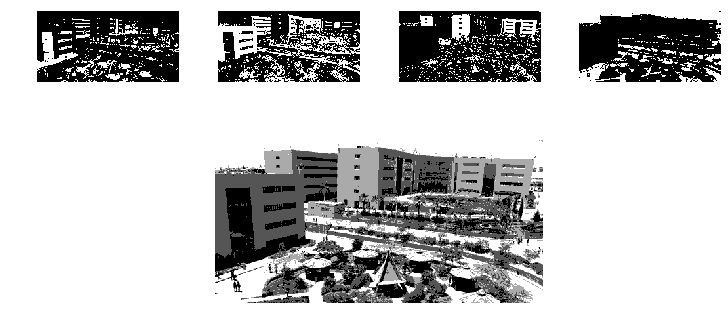

In [202]:
segment_image(guc, 3, "GUC")

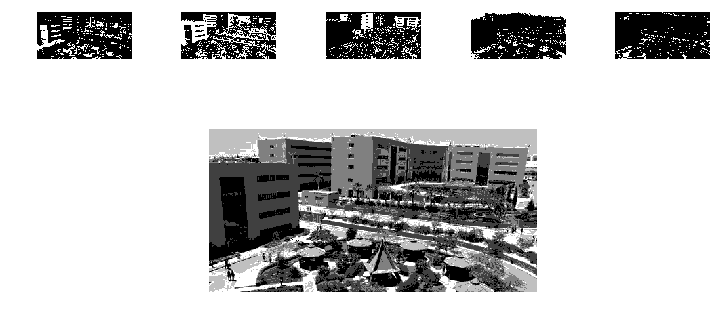

In [203]:
segment_image(guc, 4, "GUC")